In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [2]:
file_paths = {'in':'../../data/cleaned/activities/4439566437.csv'
             }

df = pd.read_csv(file_paths['in'])

# guarantee the timestamps are datetime objects
df['time'] = pd.to_datetime(df['time'])

In [4]:
if 'index' in df.columns:
    df.drop(['index'], axis=1, inplace=True)

In [5]:
df.head()

,time,ride_id,segment_id,elevation,latitude,longitude,elapsed_time,delta_time,moving_time,delta_dist,heading,speed,is_cruising,grade,elapsed_ascent,elapsed_descent,elapsed_elevation,training_window_id
0,2020-12-06 18:36:38+00:00,4.439566e+09,0.0,884.8857,40.067950,-83.127786,1.0,1.0,1.0,NaN,NaN,NaN,False,NaN,0.0,0.0,0.0,6
1,2020-12-06 18:36:39+00:00,4.439566e+09,0.0,884.8857,40.067975,-83.127779,2.0,1.0,2.0,0.001739,72.979474,6.259034,False,0.0,0.0,0.0,0.0,6
2,2020-12-06 18:36:40+00:00,4.439566e+09,0.0,884.8857,40.067999,-83.127771,3.0,1.0,3.0,0.001739,72.979474,6.259034,False,0.0,0.0,0.0,0.0,6
3,2020-12-06 18:36:41+00:00,4.439566e+09,0.0,884.8857,40.068021,-83.127801,4.0,1.0,4.0,0.002197,143.746162,7.909226,False,0.0,0.0,0.0,0.0,6
4,2020-12-06 18:36:42+00:00,4.439566e+09,0.0,884.8857,40.068023,-83.127808,5.0,1.0,5.0,0.000395,164.054604,1.422308,False,0.0,0.0,0.0,0.0,6


### Grab Segment 22 as the longest representative segment

In [10]:
df22 = df.loc[df['segment_id']==22,:].reset_index()

# 1. Initial Speed Investigation

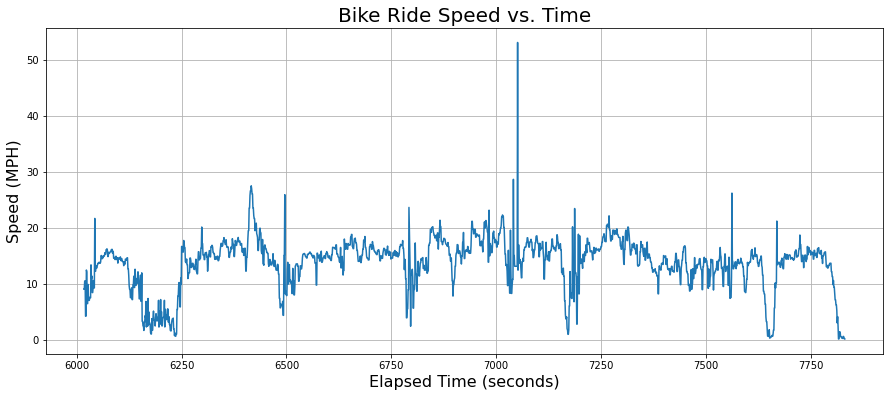

In [23]:
# visualize the jumps of cumulative time 
fig = plt.figure(figsize=(15,6))

_ = sns.lineplot(x='elapsed_time', y='speed', data=df22)
_ = plt.xlabel('Elapsed Time (seconds)', fontsize=16)
_ = plt.ylabel('Speed (MPH)', fontsize=16)
_ = plt.title('Bike Ride Speed vs. Time', fontsize=20)
_ = plt.grid()

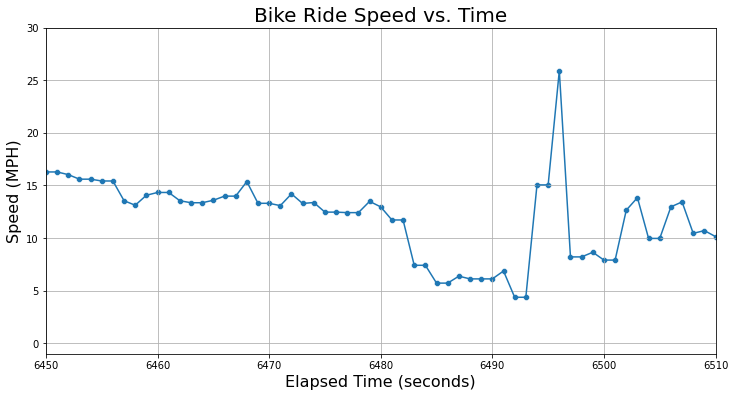

In [22]:
# visualize the jumps of cumulative time 
fig = plt.figure(figsize=(12,6))

_ = sns.lineplot(x='elapsed_time', y='speed', data=df22)
_ = sns.scatterplot(x='elapsed_time', y='speed', data=df22)
_ = plt.xlabel('Elapsed Time (seconds)', fontsize=16)
_ = plt.ylabel('Speed (MPH)', fontsize=16)
_ = plt.title('Bike Ride Speed vs. Time', fontsize=20)
_ = plt.grid()
_ = plt.xlim([6450, 6510])
_ = plt.ylim([-1,30])

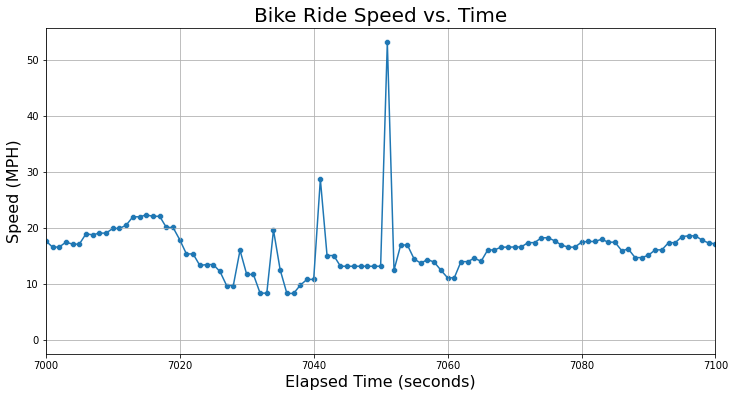

In [21]:
# visualize the jumps of cumulative time 
fig = plt.figure(figsize=(12,6))

_ = sns.lineplot(x='elapsed_time', y='speed', data=df22)
_ = sns.scatterplot(x='elapsed_time', y='speed', data=df22)
_ = plt.xlabel('Elapsed Time (seconds)', fontsize=16)
_ = plt.ylabel('Speed (MPH)', fontsize=16)
_ = plt.title('Bike Ride Speed vs. Time', fontsize=20)
_ = plt.grid()
_ = plt.xlim([7000, 7100])
#_ = plt.ylim([-1,30])

In [27]:
from scipy.fft import rfft, rfftfreq

In [28]:
SAMPLE_RATE = 1.0 # Hz
N_SAMPLES = len(df22['speed'])
signal = df22['speed']

yf = rfft(signal)
xf = rfftfreq(N_SAMPLES, 1 / SAMPLE_RATE)

KeyError: 'ALIGNED'